In [99]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0";  

In [110]:
import keras 
import numpy as np
# import librosa as lb
import sys
# import pandas as pd
from keras.utils import to_categorical
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import History 
from keras.utils import plot_model,to_categorical
from keras.optimizers import SGD
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
from iter_window import window 
# import speechpy as sp
# import statistics
from keras import backend as K
from keras.layers import Dense, Activation, Flatten

In [17]:
filename = "/media/hinton/F8E62A5EE62A1D7E/rohit/spoof/spoof_deep_features/DS_10283_853/protocol/CM_protocol/cm_train.trn"

# open the file for reading
filehandle = open(filename, 'r')
train_protocol = []
while True:
    # read a single line
    line = (filehandle.readline())
    train_protocol.append(line)
    if not line:
        break

# close the pointer to that file
filehandle.close()


In [ ]:
filename_dev = "/media/grace/Drive1/rohit/spoof/spoof_deep_features/DS_10283_853/protocol/CM_protocol/cm_develop.ndx"

# open the file for reading
filehandle_dev = open(filename_dev, 'r')
dev_protocol = []
while True:
    # read a single line
    line = (filehandle_dev.readline())
    dev_protocol.append(line)
    if not line:
        break

# close the pointer to that file
filehandle_dev.close()


In [19]:
train_protocol1 = []
for i in train_protocol:
    i = i.replace('\n','')
    train_protocol1.append(i)

In [ ]:
dev_protocol1 = []
for i in dev_protocol:
    i = i.replace('\n','')
    dev_protocol1.append(i)

In [ ]:
dev_protocol = dev_protocol1
print(dev_protocol)

In [ ]:
train_protocol = train_protocol1
print(train_protocol)

In [21]:
train_pd = []
train_label = []
for i in train_protocol:
    j = i.split(' ')[1:2]
    train_pd.append(j)
    train_label.append(i.split(' ')[3:4])
    

In [22]:
train_pd

[['T2_1000001'],
 ['T2_1000002'],
 ['T2_1000003'],
 ['T2_1000004'],
 ['T2_1000005'],
 ['T2_1000006'],
 ['T2_1000007'],
 ['T2_1000008'],
 ['T2_1000009'],
 ['T2_1000010'],
 ['T2_1000011'],
 ['T2_1000012'],
 ['T2_1000013'],
 ['T2_1000014'],
 ['T2_1000015'],
 ['T2_1000016'],
 ['T2_1000017'],
 ['T2_1000018'],
 ['T2_1000019'],
 ['T2_1000020'],
 ['T2_1000021'],
 ['T2_1000022'],
 ['T2_1000023'],
 ['T2_1000024'],
 ['T2_1000025'],
 ['T2_1000026'],
 ['T2_1000027'],
 ['T2_1000028'],
 ['T2_1000029'],
 ['T2_1000030'],
 ['T2_1000031'],
 ['T2_1000032'],
 ['T2_1000033'],
 ['T2_1000034'],
 ['T2_1000035'],
 ['T2_1000036'],
 ['T2_1000037'],
 ['T2_1000038'],
 ['T2_1000039'],
 ['T2_1000040'],
 ['T2_1000041'],
 ['T2_1000042'],
 ['T2_1000043'],
 ['T2_1000044'],
 ['T2_1000045'],
 ['T2_1000046'],
 ['T2_1000047'],
 ['T2_1000048'],
 ['T2_1000049'],
 ['T2_1000050'],
 ['T2_1000051'],
 ['T2_1000052'],
 ['T2_1000053'],
 ['T2_1000054'],
 ['T2_1000055'],
 ['T2_1000056'],
 ['T2_1000057'],
 ['T2_1000058'],
 ['T2_1000059'

In [23]:
train_pd1 = []
for i in train_pd:
    train_pd1.append(str(i)[2:-2])
train_pd = train_pd1

In [32]:
len(train_pd)

16376

In [ ]:
dev_pd = []
dev_label = []
for i in dev_protocol:
    dev_pd.append(i.split(' ')[1:2])
    dev_label.append(i.split(' ')[3:4])
    

In [ ]:
dev_pd1 = []
for i in dev_pd:
    dev_pd1.append(str(i)[2:-2])
dev_pd = dev_pd1

In [ ]:
train_pd

In [30]:
#import name of whole dataset
path = r'/media/hinton/F8E62A5EE62A1D7E/rohit/spoof/spoof_deep_features/DS_10283_853/wav/'
files = []
missing=[]
print(path)
for r, d, f in os.walk(path):
    for file in f:
        if '.wav' in file  :        
            files.append(os.path.join(r, file))
        else:
            missing.append(file)
print(len(files))


/media/hinton/F8E62A5EE62A1D7E/rohit/spoof/spoof_deep_features/DS_10283_853/wav/
0


In [31]:
len(missing)

291931

In [35]:
#get train and dev set
file_name=[]
for i in missing:
    i = i.split('/')[-1].replace('.wav','')
    file_name.append(i)

file_set = set()
train_pd_set = set()
# dev_pd_set = set()
file_set = set(file_name)
train_pd_set = set(train_pd)
# dev_pd_set = set(dev_pd)

train_set = file_set & train_pd_set
# dev_set = file_set & dev_pd_set

In [36]:
len(train_set)

16375

'T2 T2_1000002 human human'

## This code below ensures that train samples and train_labels are in the same order.

In [65]:
train_label = []
label_set = []
for k in train_set:
    for i in train_protocol1:
        j = str(i.split(' ')[1:2])[2:-2]
        if j==k:
            label_set.append(j)
            train_label.append(i.split(' ')[3])

In [73]:
len(train_label)

16375

In [74]:
len(label_set)

16375

In [ ]:
dev_label = []
for i in dev_protocol:
    j = str(i.split(' ')[1:2])[2:-2]
    if j in dev_set:
        dev_label.append(i.split(' ')[3])

In [75]:
np.save("train_label.npy",train_label)
# np.save("dev_label.npy",dev_label)

In [ ]:
#To save audio data of trainset
train_audio= []
for count, i in enumerate(train_set):
#     print(i)
    j = i.split('_')[0]
    train_audio.append(lb.load('/media/grace/Drive1/rohit/spoof/spoof_deep_features/DS_10283_853/wav/'+j+'/'+i+'.wav'))
    if count%1000==0 and count==1000:
        print('saving')
        np.save("train"+str(count)+".npy",train_audio[0:count])
    elif count%1000==0 and count >= 1000:
        print('saving')
        np.save("train"+str(count)+".npy",train_audio[count-1000:count])

In [41]:
#To save audio data of trainset
from os import path
train_audio= []
missing_audio = []
for count, i in enumerate(train_set):
#     print(i)
    j = i.split('_')[0]
    if path.exists('/media/hinton/F8E62A5EE62A1D7E/rohit/spoof/spoof_deep_features/DS_10283_853/wav/'+j+'/'+i+'.wav'):
        train_audio.append(i)
    else:
        missing_audio.append(i)

In [47]:
train_set_list = list(train_set)


In [56]:
train_protocol1[100]

'T2 T2_1000101 human human'

In [57]:
train_audio[1]

'T11_1009586'

In [ ]:
#To save .npy file of audio data of devset
dev_audio= []
for count,i in enumerate(dev_set):
#     print(i)
    j = i.split('_')[0]
    dev_audio.append(lb.load('/media/grace/Drive1/rohit/spoof/spoof_deep_features/DS_10283_853/wav/'+j+'/'+i+'.wav'))
    if count%1000==0 and count==1000:
        print('saving')
        np.save("dev"+str(count)+".npy",dev_audio[0:count])
    elif count%1000==0 and count >= 1000:
        print('saving')
        np.save("dev"+str(count)+".npy",dev_audio[count-1000:count])

In [ ]:
train_audio[1][0]

In [3]:
train = []
path = r'/media/grace/Drive1/rohit/spoof/spoof_deep_features/weights'
print(path)
for r, d, f in os.walk(path):
    for file in f:
        if '.npy' in file and 'train' in file and '_' not in file:        
            train.append(np.load(os.path.join(r, file), allow_pickle = True))
# print(train)


/media/grace/Drive1/rohit/spoof/spoof_deep_features/weights


In [ ]:
dev = []
path = r'/media/grace/Drive1/rohit/spoof/spoof_deep_features/'
print(path)
for r, d, f in os.walk(path):
    for file in f:
        if '.npy' in file and 'dev' in file and '_' not in file:        
            dev.append(np.load(os.path.join(r, file), allow_pickle = True))
print(len(dev))

In [4]:
# train[16][1]
train_format = []
for i in range(len(train)):
    for j in train[i]:
        train_format.append(j[0]) 

In [ ]:
dev_format = []
for i in range(len(dev)):
    for j in dev[i]:
        dev_format.append(j[0]) 

In [ ]:
train_format

In [5]:
train_format= np.array(train_format)


In [ ]:
dev_format = np.array(dev_format)

In [ ]:
lb.feature.mfcc(f,22050, n_mfcc=60).shape

In [66]:
delta = []
delta2 = []
#use librosa to get mfcc features
mfcc_feat_train = np.empty((16000,17880))

for count,f in enumerate(train_format):
    delta=np.array(lb.feature.delta(lb.feature.mfcc(f,22050, n_mfcc=60)))
    delta2=np.array(lb.feature.delta(lb.feature.mfcc(f,22050, n_mfcc=60), order=2))
    value =pad_sequences(sp.processing.cmvnw(np.concatenate([delta,delta2], axis=None).reshape(1,-1)),maxlen=17880,dtype='float32')
    mfcc_feat_train[count] = value
    if count%100==0:
        print(count)

    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900


In [51]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=None)


array([1, 2, 3, 4, 5, 6])

In [67]:
mfcc_feat_train.shape

(16000, 17880)

In [68]:
mfcc_feat_train.shape

(16000, 17880)

In [ ]:
# window_train = []
# for i in mfcc_feat_train:
#     window_train.append(list((window(i[0],7,7,padding=0))))

In [ ]:
mfcc_length =[]
for i in mfcc_feat_train:
    mfcc_length.append(i.shape[1])
print(max(mfcc_length))  
len(mfcc_feat_train)
median = statistics.median(mfcc_length)
print(median)

In [ ]:
#find median of the length of windowed features to padd or chop
# length_windows = []
# for i in range(len(window_train)):
#     length_windows.append(len(window_train[i]))
    
# median = statistics.median(length_windows)


# pad_window = pad_sequences(window_train,maxlen=17880,dtype='float32')

# pad_window[1][17879]

In [ ]:
# data = np.empty((16000,17880),dtype = 'float32')
# for x,i in enumerate(mfcc_feat):
#     for y,j in enumerate(i):
#         out = pad_sequences(j.reshape(1,-1),maxlen=17880,dtype='float32')
#         data[x][y] = out


In [ ]:
data

In [69]:
np.save("mfcc_trian_padded.npy",mfcc_feat_train,allow_pickle = True)

In [ ]:
import numpy as np

In [ ]:
data.shape

In [ ]:
# delta = []
# delta2 = []
# #use librosa to get mfcc features
# mfcc_feat_dev= []
# for f in dev_format:
# #     mfcc_feat_train.append(np.array((lb.features.delta(lb.feature.mfcc(f[0],22050))).flatten()))
#     delta=np.array(lb.feature.delta(lb.feature.mfcc(f,22050, n_mfcc=60)))
#     delta2=np.array(lb.feature.delta(lb.feature.mfcc(f,22050, n_mfcc=60), order=2))
# #     mfcc_feat_train = np.append(np.array(mfcc_feat_train),np.concatenate([delta,delta2], axis = 1))
#    mfcc_feat_dev.append(np.concatenate([delta,delta2], axis = 1))

# mfcc_length = []
# for i in mfcc_feat_dev:
#     mfcc_length.append(i.shape[1])
# print(max(mfcc_length))    

# data = np.empty((len(mfcc_feat_dev),60,max(mfcc_length)),dtype = 'float32')
# for x,i in enumerate(mfcc_feat_dev):
#     for y,j in enumerate(i):
#         out = pad_sequences(j.reshape(1,-1),maxlen=max(mfcc_length),dtype='float32')
#         data[x][y] = out


# np.save("mffc_dev",data,allow_pickle = True)

In [ ]:
# data_dev = np.load("mffc_dev.npy")

In [101]:
data_train = np.load("mfcc_trian_padded.npy")

In [102]:
data_train.shape

(16000, 17880)

In [103]:
# data_train = data_train.reshape(16000,-1)

In [106]:
train_labels = np.load("train_label.npy")

train_labels=list(train_labels)

train_labels1 = list()
for i in train_labels:
    if i == b'human':
        train_labels1.append(0)
    else:
        train_labels1.append(1)



In [107]:
train_labels1.count(1)

12625

In [108]:
# scalers = {}
# x_train,y_train = np.load("train_data1.npy"), np.load("train_labels1.npy")
# for i in range(x_train.shape[1]):
#     scalers[i] = MinMaxScaler()
#     x_train[:, i, :] = scalers[i].fit_transform(x_train[:, i, :]) 
# x_validation,y_validation = np.load("validation_data1.npy"), np.load("validation_labels1.npy")
# for i in range(x_validation.shape[1]):
#     x_validation[:, i, :] = scalers[i].transform(x_validation[:, i, :]) 
# x_test,y_test = np.load("test_data1.npy"), np.load("test_labels1.npy")
# for i in range(x_test.shape[1]):
#     x_test[:, i, :] = scalers[i].transform(x_test[:, i, :]) 

In [112]:
#define neural network
output = []
model = Sequential()

model.add(Dense(1000, activation='sigmoid', input_shape = (17880,)))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(1000, activation='sigmoid'))
model.add(Dense(64, activation='linear'))
model.add(Dense(2, activation='softmax'))

# tb = TensorBoard(log_dir="/media/grace/Drive1/rohit/spoof/spoof_deep_features/visuals/logs/{}".format(time()))

# filepath="/media/grace/Drive1/rohit/spoof/spoof_deep_features/weights/weights.best.hdf5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# model.load_weights("/media/grace/Drive1/rohit/spoof/spoof_deep_features/weights/weights.best.hdf5")

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
layeroutputs = []
# for i in pad_window:
model.fit(data_train, to_categorical(train_labels1[0:16000]), epochs = 10,batch_size = 64)#, callbacks = callbacks_list, validation_data=(x_validation,y_validation))
get_5th_layer_output = K.function([model.layers[0].input],
                                 [model.layers[4].output])
output = get_5th_layer_output([data_train])[0]
    

# y_pred =  model.predict(x_test)
# y_pred = np.round(y_pred[:,1])
# print(metrics.accuracy_score(y_pred,y_test))

Epoch 1/10
16000/16000 [==============================] - 59s 4ms/step - loss: 3.6886 - acc: 0.7661
Epoch 2/10
16000/16000 [==============================] - 57s 4ms/step - loss: 3.6809 - acc: 0.7704
Epoch 3/10
16000/16000 [==============================] - 57s 4ms/step - loss: 3.6809 - acc: 0.7704
Epoch 4/10
16000/16000 [==============================] - 57s 4ms/step - loss: 3.6809 - acc: 0.7704
Epoch 5/10
16000/16000 [==============================] - 57s 4ms/step - loss: 3.6809 - acc: 0.7704
Epoch 6/10
16000/16000 [==============================] - 57s 4ms/step - loss: 3.6809 - acc: 0.7704
Epoch 7/10
16000/16000 [==============================] - 57s 4ms/step - loss: 3.6809 - acc: 0.7704
Epoch 8/10
16000/16000 [==============================] - 56s 4ms/step - loss: 3.6809 - acc: 0.7704
Epoch 9/10
16000/16000 [==============================] - 44s 3ms/step - loss: 3.6809 - acc: 0.7704
Epoch 10/10
16000/16000 [==============================] - 44s 3ms/step - loss: 3.6809 - acc: 0.7704

In [113]:
output.shape

(16000, 64)

In [114]:
np.save("BNF.npy",output)

In [2]:
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.utils import shuffle
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


# Load Dataset and Labels
## 0 : Human and 1 : spoof

In [115]:
data_embedding=np.load('BNF.npy')
train_labels = np.load("train_label.npy")

train_labels=list(train_labels)

train_labels1 = list()
for i in train_labels:
    if i == b'human':
        train_labels1.append(0)
    else:
        train_labels1.append(1)
train_labels = train_labels1[0:16000]

# rus = RandomUnderSampler(random_state=0)
# X_resampled, y_resampled = rus.fit_resample(data_embedding, train_labels1[:16000])
# X,Y = shuffle(X_resampled,y_resampled)

In [116]:
len(train_labels)

16000

In [117]:
data_embedding.shape

(16000, 64)

In [118]:
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{0: 3674, 1: 12326}

## seperate the zeros and the ones.


In [119]:
train_labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [120]:
j , k = 0,0
# human_samples = np.empty((3674,17880)) # wrong array size as BNF is of size 3674,64
human_samples = np.empty((3674,64))# corrected
human_labels= []
# spoof_samples = np.empty((12326,17880))
spoof_samples = np.empty((12326,64))
spoof_labels = []
for count,i in enumerate(train_labels):
    if i ==0:
#         human_samples=np.append(human_samples,data_embedding[count])# Do not append insert the data at that position
        human_samples[j]=data_embedding[count]
        human_labels.append(train_labels[count])
        j = j+1
    elif i ==1:
#         spoof_samples=np.append(spoof_samples,data_embedding[count])
        spoof_samples[k] = data_embedding[count]
        spoof_labels.append(train_labels[count])
        k = k+1
        
print(len(human_labels))
print(len(spoof_labels))
print((human_samples[3]))
        

3674
12326
[-2.39496517  1.73302317 -1.9223125   1.52487719 -2.39318728 -2.21454763
 -2.8514173   1.82485712 -2.33119249  1.83118618  2.21320868  1.68966639
 -2.98004627  2.05464816 -1.4914571  -2.94966245  1.16140962 -1.76028669
 -1.86300623  2.15525508  2.26972604  3.18985724 -2.20618391  1.68238831
 -1.53491747  2.65796614 -2.09807134  1.67124736 -2.30950356  2.02301502
 -3.57424188 -1.32865715 -2.27288747 -0.95367038 -2.46624875 -1.78562236
  2.10490227 -2.54272103 -1.41813159  2.30872655  2.10664606  1.05372107
  2.54553199  3.20027208 -1.98370695 -1.97464228  2.10336065  1.61168063
  1.22995579 -2.49896264 -2.65007734 -3.01731825 -2.22176933  2.44728708
  1.9021678   3.62066412 -2.5838232   2.30285954 -1.65367055 -0.13159984
  2.93897557 -2.55029631  2.62169766 -1.51936221]


In [121]:
np.save("human_samples.npy",human_samples,allow_pickle=True)
np.save("spoof_samples.npy",spoof_samples,allow_pickle=True)
np.save("human_labels.npy",human_labels)
np.save("spoof_labels.npy",spoof_labels)

# Fit GMM for human samples

In [122]:
human_samples = np.load("human_samples.npy")
human_labels = np.load("human_labels.npy")
spoof_samples = np.load("spoof_samples.npy")
spoof_labels = np.load("spoof_labels.npy")

In [123]:
human_samples.shape

(3674, 64)

In [124]:
gmm = GMM(n_components=512).fit(human_samples)

In [125]:
y_predicted = gmm.predict(human_samples)

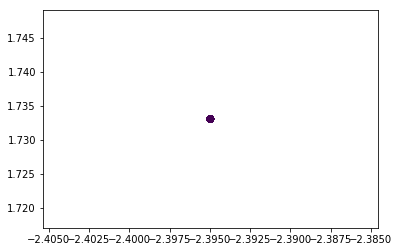

In [126]:
plt.scatter(human_samples[:, 0], human_samples[:, 1], c=y_predicted, s=40, cmap='viridis');

In [127]:
y_predicted.shape

(3674,)

In [128]:
human_labels.shape

(3674,)

In [129]:
unique, counts = np.unique(y_predicted, return_counts=True)
dict(zip(unique, counts))

{182: 3674}

In [130]:
fpr, tpr, threshold = roc_curve(human_labels, y_predicted, pos_label=1)
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, threshold)(eer)

/media/hinton/work/lib/python3.5/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [131]:
tpr

array([nan, nan])

In [132]:
eer

1.8189894035458565e-12

# Fit GMM for spoof samples

In [133]:
gmm_spoof = GMM(n_components=512).fit(spoof_samples)

In [134]:
y_predicted_spoof = gmm.predict(spoof_samples)

In [135]:
unique, counts = np.unique(y_predicted_spoof, return_counts=True)
dict(zip(unique, counts))

{182: 12326}

In [136]:
fpr, tpr, threshold = roc_curve(spoof_labels, y_predicted_spoof, pos_label=1)
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, threshold)(eer)

/media/hinton/work/lib/python3.5/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


In [137]:
eer

1.8189894035458565e-12

# fit GMM for all samples

In [138]:
data_embedding=np.load('BNF.npy')
train_labels = np.load("train_label.npy")

In [139]:
train_labels=list(train_labels)

train_labels1 = list()
for i in train_labels:
    if i == b'human':
        train_labels1.append(0)
    else:
        train_labels1.append(1)
train_labels = train_labels1[0:16000]


In [145]:
gmm = GMM(n_components=512,covariance_type='full', random_state=0).fit(data_embedding)

In [146]:
y_predicted = gmm.predict(data_embedding)

In [147]:
unique, counts = np.unique(y_predicted, return_counts=True)
dict(zip(unique, counts))

{74: 16000}

In [148]:
fpr, tpr, threshold = roc_curve(train_labels, y_predicted, pos_label=1)
eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, threshold)(eer)

In [149]:
eer

0.5